## Model for Football Prediction

Took a promising database from internet and decided to perform an approach with $\textbf{Machine Learning}$ to see if I could get a good estimator.

In [1]:
import numpy as np
import pandas as pd
import requests
import xlsxwriter
import math
import tensorflow as tf

In [2]:
df = pd.read_csv('C:\\Users\\marti\\Downloads\\archive\\full_data.csv')

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96337 entries, 0 to 96336
Data columns (total 56 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   League               96337 non-null  object 
 1   Home                 96337 non-null  object 
 2   Away                 96337 non-null  object 
 3   INC                  96305 non-null  object 
 4   Round                96337 non-null  object 
 5   Date                 96337 non-null  object 
 6   Time                 96337 non-null  object 
 7   H_Score              96305 non-null  float64
 8   A_Score              96305 non-null  float64
 9   HT_H_Score           96305 non-null  float64
 10  HT_A_Score           96305 non-null  float64
 11  WIN                  96305 non-null  object 
 12  H_BET                95181 non-null  float64
 13  X_BET                95181 non-null  float64
 14  A_BET                95181 non-null  float64
 15  WIN_BET              95181 non-null 

The dataset at hand is extensive, yet we will be streamlining it by removing columns pertaining to betting and sparse data, and standardizing all data types for uniformity.

In [4]:
print(df.columns)


Index(['League', 'Home', 'Away', 'INC', 'Round', 'Date', 'Time', 'H_Score',
       'A_Score', 'HT_H_Score', 'HT_A_Score', 'WIN', 'H_BET', 'X_BET', 'A_BET',
       'WIN_BET', 'OVER_2.5', 'OVER_3.5', 'H_15', 'A_15', 'H_45_50', 'A_45_50',
       'H_90', 'A_90', 'H_Missing_Players', 'A_Missing_Players',
       'Missing_Players', 'H_Ball_Possession', 'A_Ball_Possession',
       'H_Goal_Attempts', 'A_Goal_Attempts', 'H_Shots_on_Goal',
       'A_Shots_on_Goal', 'H_Attacks', 'A_Attacks', 'H_Dangerous_Attacks',
       'A_Dangerous_Attacks', 'H_Shots_off_Goal', 'A_Shots_off_Goal',
       'H_Blocked_Shots', 'A_Blocked_Shots', 'H_Free_Kicks', 'A_Free_Kicks',
       'H_Corner_Kicks', 'A_Corner_Kicks', 'H_Offsides', 'A_Offsides',
       'H_Throw_in', 'A_Throw_in', 'H_Goalkeeper_Saves', 'A_Goalkeeper_Saves',
       'H_Fouls', 'A_Fouls', 'H_Yellow_Cards', 'A_Yellow_Cards', 'Game Link'],
      dtype='object')


In [5]:
columns_to_drop = [
    'H_Score', 'A_Score', 'HT_H_Score', 'HT_A_Score',
    'H_BET', 'X_BET', 'A_BET', 'WIN_BET',
    'OVER_2.5', 'OVER_3.5', 
    'H_15', 'A_15', 'H_45_50', 'A_45_50', 'H_90', 'A_90',
    'Game Link', 'INC', 'Round', 'Home', 'Away', 'H_Throw_in', 'A_Throw_in', 'A_Dangerous_Attacks', 'H_Dangerous_Attacks', 'H_Missing_Players', 'A_Missing_Players',
    'Missing_Players'
]

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df.drop(['Date', 'Time'], axis=1, inplace=True)

df['H_Attacks'].fillna(0, inplace=True)
df['A_Attacks'].fillna(0, inplace=True)

df.drop(columns_to_drop, axis=1, inplace=True)


C:\Users\marti\AppData\Local\Temp\ipykernel_10404\4203122447.py:10: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['Date'])
C:\Users\marti\AppData\Local\Temp\ipykernel_10404\4203122447.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['H_Attacks'].fillna(0, inplace=True)
C:\Users\marti\AppData\Local\Temp\ipykernel_10404\4203122447.py:17: FutureWarning: A value is trying to be 

In [6]:
print(df.columns)

Index(['League', 'WIN', 'H_Ball_Possession', 'A_Ball_Possession',
       'H_Goal_Attempts', 'A_Goal_Attempts', 'H_Shots_on_Goal',
       'A_Shots_on_Goal', 'H_Attacks', 'A_Attacks', 'H_Shots_off_Goal',
       'A_Shots_off_Goal', 'H_Blocked_Shots', 'A_Blocked_Shots',
       'H_Free_Kicks', 'A_Free_Kicks', 'H_Corner_Kicks', 'A_Corner_Kicks',
       'H_Offsides', 'A_Offsides', 'H_Goalkeeper_Saves', 'A_Goalkeeper_Saves',
       'H_Fouls', 'A_Fouls', 'H_Yellow_Cards', 'A_Yellow_Cards', 'Year',
       'Month', 'Day'],
      dtype='object')


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96337 entries, 0 to 96336
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   League              96337 non-null  object 
 1   WIN                 96305 non-null  object 
 2   H_Ball_Possession   51887 non-null  object 
 3   A_Ball_Possession   51887 non-null  object 
 4   H_Goal_Attempts     52800 non-null  float64
 5   A_Goal_Attempts     52800 non-null  float64
 6   H_Shots_on_Goal     52797 non-null  float64
 7   A_Shots_on_Goal     52797 non-null  float64
 8   H_Attacks           96337 non-null  float64
 9   A_Attacks           96337 non-null  float64
 10  H_Shots_off_Goal    52338 non-null  float64
 11  A_Shots_off_Goal    52338 non-null  float64
 12  H_Blocked_Shots     35190 non-null  float64
 13  A_Blocked_Shots     35190 non-null  float64
 14  H_Free_Kicks        36390 non-null  float64
 15  A_Free_Kicks        36390 non-null  float64
 16  H_Co

In [8]:
df['WIN'] = df['WIN'].map({'Home': 1, 'Draw': 0, 'Away': 2})
big_leagues = ['championship', 'premier-league', 'bundesliga', 'laliga', 'serie-a']
df_filtered = df[df['League'].isin(big_leagues)]
df = df_filtered

In [9]:
df['H_Ball_Possession'] = df['H_Ball_Possession'].str.rstrip('%').astype(float) / 100.0
df['A_Ball_Possession'] = df['A_Ball_Possession'].str.rstrip('%').astype(float) / 100.0

In [10]:
print(df.columns)


Index(['League', 'WIN', 'H_Ball_Possession', 'A_Ball_Possession',
       'H_Goal_Attempts', 'A_Goal_Attempts', 'H_Shots_on_Goal',
       'A_Shots_on_Goal', 'H_Attacks', 'A_Attacks', 'H_Shots_off_Goal',
       'A_Shots_off_Goal', 'H_Blocked_Shots', 'A_Blocked_Shots',
       'H_Free_Kicks', 'A_Free_Kicks', 'H_Corner_Kicks', 'A_Corner_Kicks',
       'H_Offsides', 'A_Offsides', 'H_Goalkeeper_Saves', 'A_Goalkeeper_Saves',
       'H_Fouls', 'A_Fouls', 'H_Yellow_Cards', 'A_Yellow_Cards', 'Year',
       'Month', 'Day'],
      dtype='object')


In [11]:
df = pd.get_dummies(df, columns=['League'])
df = df.dropna()

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 13142 entries, 1671 to 41248
Data columns (total 33 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   WIN                    13142 non-null  float64
 1   H_Ball_Possession      13142 non-null  float64
 2   A_Ball_Possession      13142 non-null  float64
 3   H_Goal_Attempts        13142 non-null  float64
 4   A_Goal_Attempts        13142 non-null  float64
 5   H_Shots_on_Goal        13142 non-null  float64
 6   A_Shots_on_Goal        13142 non-null  float64
 7   H_Attacks              13142 non-null  float64
 8   A_Attacks              13142 non-null  float64
 9   H_Shots_off_Goal       13142 non-null  float64
 10  A_Shots_off_Goal       13142 non-null  float64
 11  H_Blocked_Shots        13142 non-null  float64
 12  A_Blocked_Shots        13142 non-null  float64
 13  H_Free_Kicks           13142 non-null  float64
 14  A_Free_Kicks           13142 non-null  float64
 15  H_Co

Our final data has information of $13.142$ matches, which should be more than enough. Now we check if everything is numerical and change types to float32, to avoid problems.

In [13]:
df[['League_bundesliga', 'League_championship', 'League_laliga', 'League_premier-league', 'League_serie-a']] = df[['League_bundesliga', 'League_championship', 'League_laliga', 'League_premier-league', 'League_serie-a']].astype(int)

numeric_columns = df.select_dtypes(include=['number']).columns

if len(numeric_columns) == len(df.columns):
    print("Todas las columnas son numéricas.")
else:
    print("No todas las columnas son numéricas.")
    print("Columnas no numéricas:", df.columns.difference(numeric_columns))


Todas las columnas son numéricas.


In [14]:
df = df.astype(np.float32)
print(df.dtypes)

WIN                      float32
H_Ball_Possession        float32
A_Ball_Possession        float32
H_Goal_Attempts          float32
A_Goal_Attempts          float32
H_Shots_on_Goal          float32
A_Shots_on_Goal          float32
H_Attacks                float32
A_Attacks                float32
H_Shots_off_Goal         float32
A_Shots_off_Goal         float32
H_Blocked_Shots          float32
A_Blocked_Shots          float32
H_Free_Kicks             float32
A_Free_Kicks             float32
H_Corner_Kicks           float32
A_Corner_Kicks           float32
H_Offsides               float32
A_Offsides               float32
H_Goalkeeper_Saves       float32
A_Goalkeeper_Saves       float32
H_Fouls                  float32
A_Fouls                  float32
H_Yellow_Cards           float32
A_Yellow_Cards           float32
Year                     float32
Month                    float32
Day                      float32
League_bundesliga        float32
League_championship      float32
League_lal

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('WIN', axis=1)
Y = df['WIN']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

In [16]:
from tensorflow.keras.utils import to_categorical

Y_one_hot = to_categorical(Y)
Y_one_hot

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       ...,
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [17]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential([
    Dense(32, input_shape=(32,), activation='relu'),
    Dense(20, activation='relu'),  
    Dense(3, activation='softmax')  
])

In [18]:
from keras.optimizers import Adam

model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',  
              metrics=['accuracy'])


In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y_one_hot, test_size=0.2, random_state=42)

history = model.fit(
    x=x_train, 
    y=y_train, 
    validation_split=0.8, 
    batch_size=10, 
    epochs=10, 
    callbacks=[tf.keras.callbacks.ReduceLROnPlateau()], 
    shuffle=True, 
    verbose=2
)


Epoch 1/10


211/211 - 2s - loss: 1.0708 - accuracy: 0.4253 - val_loss: 0.9875 - val_accuracy: 0.5221 - lr: 0.0010 - 2s/epoch - 8ms/step
Epoch 2/10
211/211 - 1s - loss: 0.9060 - accuracy: 0.5666 - val_loss: 0.8512 - val_accuracy: 0.6040 - lr: 0.0010 - 796ms/epoch - 4ms/step
Epoch 3/10
211/211 - 1s - loss: 0.7351 - accuracy: 0.6722 - val_loss: 0.6678 - val_accuracy: 0.7038 - lr: 0.0010 - 826ms/epoch - 4ms/step
Epoch 4/10
211/211 - 1s - loss: 0.5451 - accuracy: 0.7797 - val_loss: 0.4900 - val_accuracy: 0.7975 - lr: 0.0010 - 811ms/epoch - 4ms/step
Epoch 5/10
211/211 - 1s - loss: 0.3851 - accuracy: 0.8739 - val_loss: 0.3645 - val_accuracy: 0.8704 - lr: 0.0010 - 886ms/epoch - 4ms/step
Epoch 6/10
211/211 - 1s - loss: 0.2708 - accuracy: 0.9372 - val_loss: 0.2635 - val_accuracy: 0.9270 - lr: 0.0010 - 869ms/epoch - 4ms/step
Epoch 7/10
211/211 - 1s - loss: 0.1884 - accuracy: 0.9748 - val_loss: 0.1961 - val_accuracy: 0.9577 - lr: 0.0010 - 798ms/epoch - 4ms/step
Epoch 8/10
211/211 - 1s - loss: 0.1

In [20]:
y_pred = model.evaluate(x_test, y_test, batch_size=10)

263/263 [==============================] - 0s 810us/step - loss: 0.1040 - accuracy: 0.9821


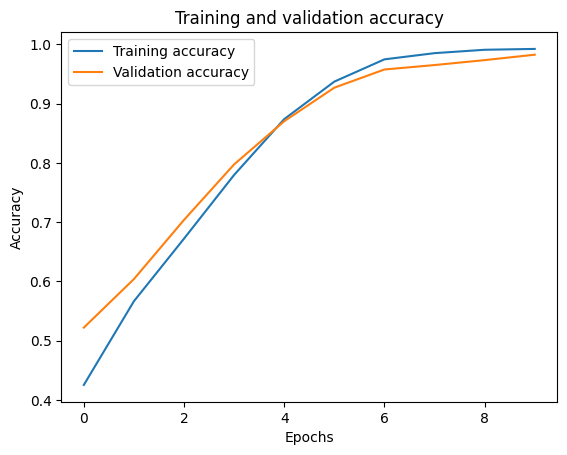

In [21]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label="Training accuracy")
plt.plot(history.history['val_accuracy'], label="Validation accuracy")
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


       loss  accuracy  val_loss  val_accuracy     lr
0  1.070768  0.425309  0.987519      0.522054  0.001
1  0.906004  0.566603  0.851231      0.603971  0.001
2  0.735107  0.672217  0.667760      0.703840  0.001
3  0.545077  0.779734  0.489970      0.797527  0.001
4  0.385065  0.873930  0.364530      0.870408  0.001
5  0.270785  0.937203  0.263471      0.927000  0.001
6  0.188398  0.974786  0.196050      0.957675  0.001
7  0.132558  0.985252  0.156920      0.965165  0.001
8  0.094152  0.990961  0.127557      0.973487  0.001
9  0.075382  0.992388  0.101677      0.982642  0.001


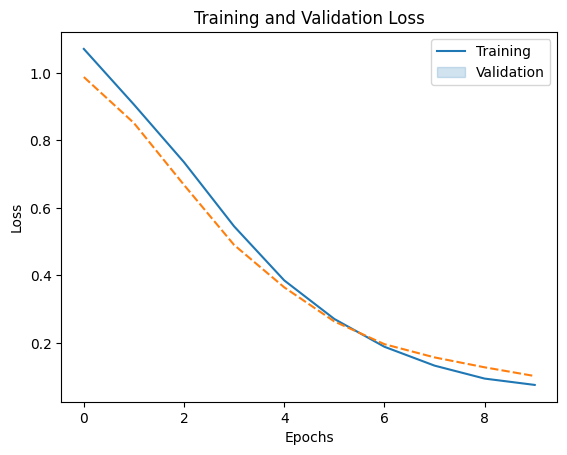

In [22]:
# For plotting with seaborn
import seaborn as sns  

# Create pandas DataFrame
df_history = pd.DataFrame(history.history)
print(df_history)

# Plot using Seaborn
my_plot = sns.lineplot(data=df_history[["loss","val_loss"]])
my_plot.set_xlabel('Epochs')
my_plot.set_ylabel('Loss')
plt.legend(labels=["Training", "Validation"])
plt.title('Training and Validation Loss')
plt.show()


In [23]:
y_test_class = np.argmax(y_test, axis=1)
predictions = np.argmax(model.predict(x_test),axis=1)
predictions.size


83/83 [==============================] - 0s 799us/step


2629

In [24]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test_class, predictions)


0.9821224800304298

(<Figure size 400x500 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

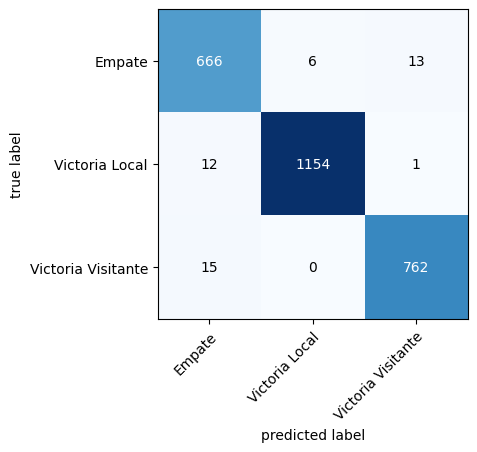

In [25]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test_class, predictions)

plot_confusion_matrix(conf_mat=mat, figsize=(4, 5), class_names=['Empate', 'Victoria Local', 'Victoria Visitante'])


In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test_class, predictions, target_names=['Empate', 'Victoria Local', 'Victoria Visitante']))

                    precision    recall  f1-score   support

            Empate       0.96      0.97      0.97       685
    Victoria Local       0.99      0.99      0.99      1167
Victoria Visitante       0.98      0.98      0.98       777

          accuracy                           0.98      2629
         macro avg       0.98      0.98      0.98      2629
      weighted avg       0.98      0.98      0.98      2629



83/83 [==============================] - 0s 859us/step


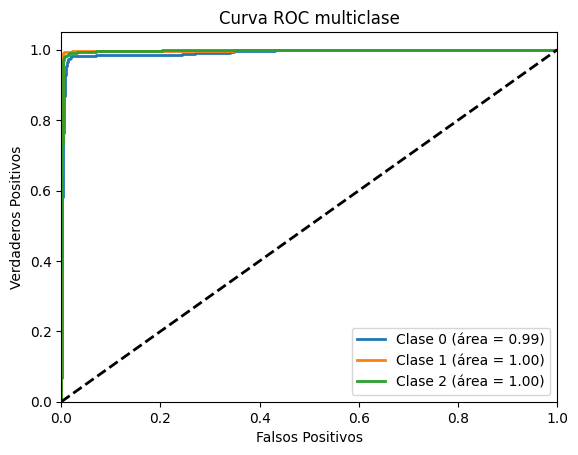

In [27]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

y_test_binarized = label_binarize(y_test_class, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

y_pred = model.predict(x_test)

for i in range(n_classes):
    fpr, tpr, thresholds = roc_curve(y_test_binarized[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label='Clase {0} (área = {1:0.2f})'.format(i, roc_auc))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Falsos Positivos')
plt.ylabel('Verdaderos Positivos')
plt.title('Curva ROC multiclase')
plt.legend(loc="lower right")
plt.show()


The model's exceptional performance raises concerns about the integrity of the data, warranting a thorough validation to ensure its reliability.